# Exercise 2.1

Complete the function that calculates the similarities of all texts in the dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

In [2]:
data = pd.read_csv('E2-Data.csv', sep=";",encoding="ISO-8859-1")

In [3]:
data['Text']=data['Text'].astype('str')
data['Company']=data['Company'].astype('str')
data['Semester']=data['Semester'].astype('category')
data['Age']=data['Age'].astype('int')
data['Undergrad']=data['Undergrad'].astype('category')
data.dtypes

Text           object
Undergrad    category
Semester     category
Age             int32
Company        object
dtype: object

In [4]:
def similarity(data):
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    for i in range(len(data)):
        for j in range(len(data)):
            results.loc[i,j] = float(len((set(data["Text"][i].split())).intersection((set(data["Text"][j].split()))))) / (len((set(data["Text"][i].split()))) + len((set(data["Text"][j].split()))) - len((set(data["Text"][i].split())).intersection((set(data["Text"][j].split())))))
    assert results.shape == (data.shape[0], data.shape[0])
    return results

In [5]:
simil = similarity(data)

# Exercise 2.2

Calculate descriptive statistics of the dataset

- Pivot tables analyzing companies, universities, age and master semester.

In [6]:
data.head(12)

,Text,Undergrad,Semester,Age,Company
0,Uno de los criterios más importantes en la sel...,Ingeniería de sistemas,4,46,ETB
1,"Actualmente para las empresas, los científicos...",Administración de empresas,2,38,Interactivo contact center sa
2,Dos de las principales razones por las que a p...,Economía,2,29,Bancamía
3,Differences of a Data Scientist and a Data Eng...,Administración de empresas,2,25,Universidad de los andes
4,Existen diferencias significativas en el perfi...,Ingeniería industrial,2,25,Mullen lowe SSP3
5,El ingeniero de datos es un profesional dedica...,Estadística,4,33,Nielsen
6,nan,Ingeniería industrial,2,30,Universidad de los andes
7,"En términos de costo, SAS es un software comer...",Ingeniería de sistemas,2,30,Telefónica
8,Las diferencias de un científico de datos y un...,Estadística,2,34,Icfes
9,Siendo dos grandes software's de analítica los...,Estadística,2,33,Campus BBVA


In [7]:
simil.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,0.090301,0.139623,0.131868,0.118959,0.115385,0.0,0.153846,0.110448,0.154545,...,0.162630,0.100806,0.124113,0.111969,0.112676,0.137124,0.141379,0.125000,0.111111,0.121711
1,0.090301,1.000000,0.096296,0.118081,0.134615,0.128713,0.0,0.107843,0.119266,0.096491,...,0.100000,0.126582,0.126812,0.105882,0.091549,0.102310,0.124567,0.119718,0.120773,0.116667
2,0.139623,0.096296,1.000000,0.102767,0.106122,0.085324,0.0,0.141304,0.092652,0.121406,...,0.141791,0.089686,0.099617,0.075000,0.087452,0.107143,0.082734,0.097015,0.078431,0.087413
3,0.131868,0.118081,0.102767,1.000000,0.153527,0.113014,0.0,0.137809,0.136808,0.104938,...,0.154982,0.141553,0.176000,0.162281,0.126923,0.165441,0.124088,0.140152,0.131646,0.152174
4,0.118959,0.134615,0.106122,0.153527,1.000000,0.156934,0.0,0.121429,0.167808,0.111111,...,0.138060,0.203980,0.162602,0.142222,0.130952,0.144444,0.149425,0.158103,0.170667,0.156716


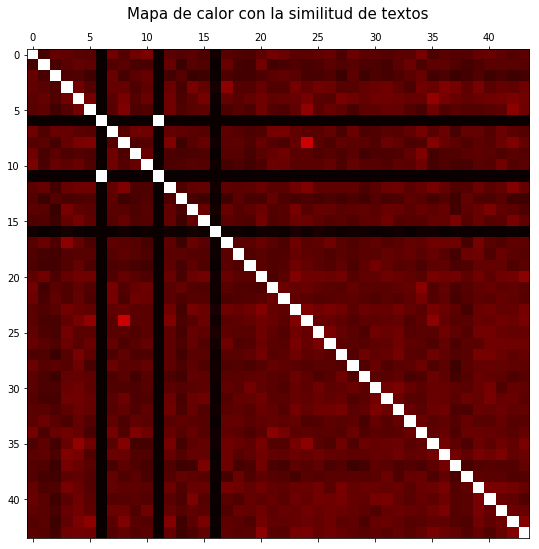

In [8]:
fig = plt.figure(figsize = (9,9)) 
ax3 = fig.add_subplot(111)
ax3.matshow(simil, cmap=plt.cm.hot, aspect='auto') 
ax3.set_title('Mapa de calor con la similitud de textos', fontsize=15)
plt.show()

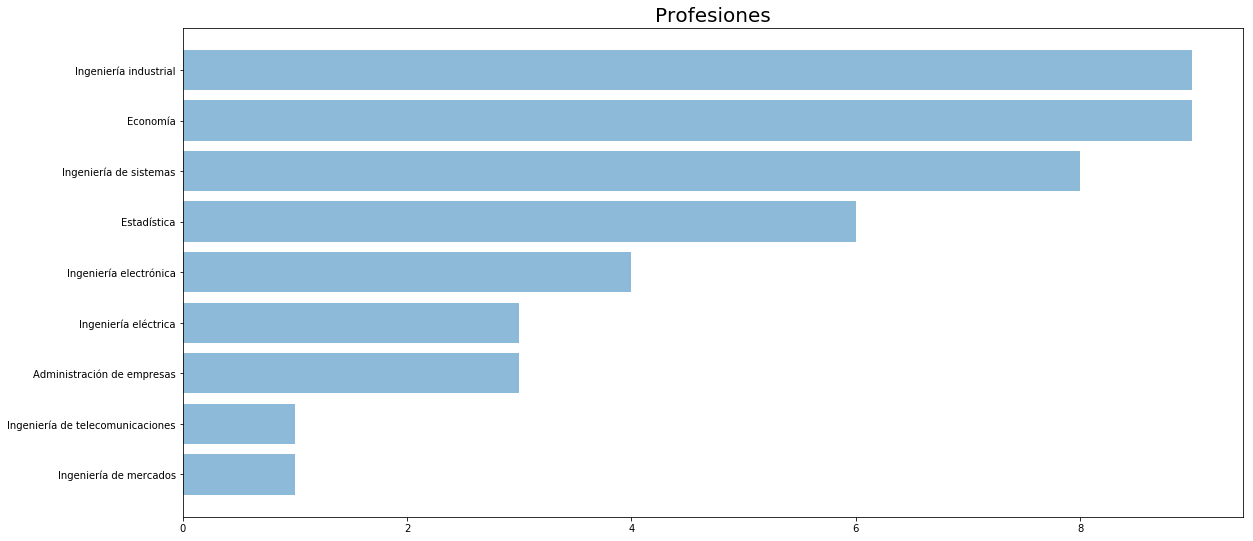

In [10]:
filter1 = pd.DataFrame(data.Undergrad.value_counts())
filter1
fig1, axs = plt.subplots(1, 1, figsize=(19, 9), sharey=True)
plt.title("Profesiones", fontsize=20)
axs.barh(filter1.index, filter1["Undergrad"], align='center', alpha=0.5)
axs.invert_yaxis()


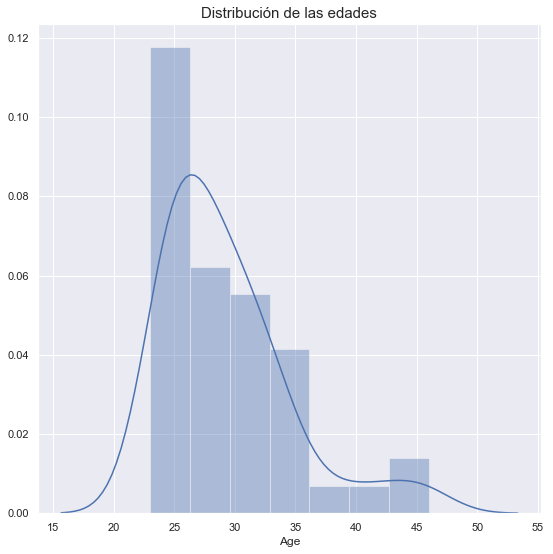

In [11]:
fig = plt.figure(figsize = (9,9)) 
sns.set(color_codes=True)
sns.distplot(data["Age"]).set_title('Distribución de las edades', fontsize=15);

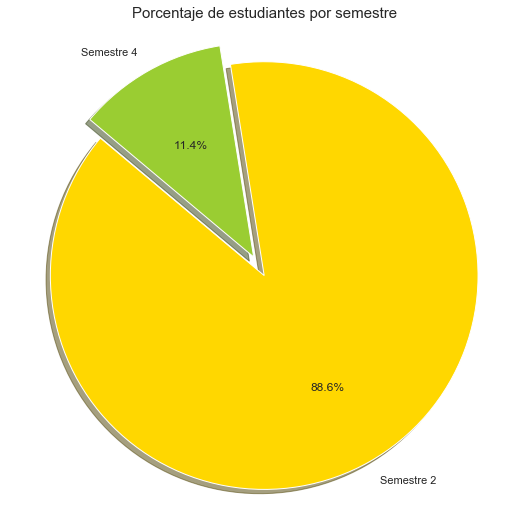

In [12]:
filter1 = pd.DataFrame(data.Semester.value_counts())
filter1.index = ["Semestre 2", "Semestre 4"]
fig = plt.figure(figsize = (9,9)) 
sums = pd.DataFrame(data.Semester.value_counts())
explode = (0.1, 0)
colors = ['gold', 'yellowgreen']
sizes = filter1["Semester"]
labels = filter1.index
figsize=(19, 9)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Porcentaje de estudiantes por semestre", fontsize=15)
plt.show()

In [13]:
filter1 = pd.DataFrame(data.Company.value_counts())
filter1

,Company
Universidad de los andes,2
Departamento nacional de planeación,2
RBM Redeban multicolor sa,1
Aseguradora solidaria de Colombia,1
Ecopetrol,1
Uber,1
Banco caja social,1
Aon Benbenfield corredores de reaseguros,1
Codensa sa esp,1
Bancamía,1


In [14]:
pd.pivot_table(data,index=["Undergrad","Semester"])

Age
Undergrad                        Semester           
Administración de empresas       2         29.666667
Economía                         2         26.111111
Estadística                      2         33.800000
                                 4         33.000000
Ingeniería de mercados           2         23.000000
Ingeniería de sistemas           2         31.000000
                                 4         33.250000
Ingeniería de telecomunicaciones 2         31.000000
Ingeniería electrónica           2         32.000000
Ingeniería eléctrica             2         27.666667
Ingeniería industrial            2         26.444444